# CV 2018 Differential Methylation Analysis
- data generated from NSF preliminary experiment, collected by Sarah Gignoux-Wolfsohn 
- using the counts data generated from htseq-counts as well as the GTF annotation file and meta data to analyze and identify differentially methylated genes

In [1]:
# changes size of plots
options(repr.plot.width=15, repr.plot.height=15)

#### installing packages
DESeq2, dplyr, EnhancedVolcano

In [2]:
library(DESeq2)
# this only works when i'm in r-env

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("EnhancedVolcano")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'EnhancedVolcano'”
Old packages: 'BH', 'biomaRt', 'Biostrings', 'brew', 'brio', 'bslib', 'callr',
  'commonmark', 'cowplot', 'curl', 'data.table', 'DBI', 'desc', 'digest', 'DT',
  'GenomeInfoDb', 'GenomicAlignments', 'GenomicFeatures', 'ggforce', 'ggfun',
  'ggnewscale', 'ggplot2', 'ggraph', 'ggrepel', 'ggtree', 'glue', 'GOSemSim',
  'graphlayouts', 'haven', 'htmlwidgets', 'httpuv', 'igraph', 'MASS', 'Matrix',
  'mgcv', 'nlme', 'patchwork', 'pbdZMQ', 'pkgbuild', 'pkgload', 'ps', 'ragg',
  'Rcpp', 'RcppArmadillo', 'RCurl', 'readr', 'reprex', 'Rhtslib', 'rlang',
  'RUnit', 'rvest', 'scales', 'shadowte

In [5]:
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



### loading in data frames
specifically the meta data, counts matrices, and gtf file

In [6]:
# meta data containing treatment conditions for CV samples
meta = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv")
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
2,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
3,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
4,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
5,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
6,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


In [7]:
# counts matrix generated from htseq-counts, with type=exon
counts_exon = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_exon.txt", sep='\t')
head(counts_exon)

,X,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,⋯,X0.20,X0.21,X0.22,X0.23,X0.24,X0.25,X0.26,X0.27,X0.28,X0.29
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111099029,5,12,14,11,14,12,9,14,11,⋯,9,6,1,30,12,15,0,0,3,0
2,LOC111099030,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111099031,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111099032,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111099033,0,0,10,0,1,0,0,0,0,⋯,1,0,0,1,0,0,0,0,0,0
6,LOC111099034,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
# counts matrix generated from htseq-counts, with type=gene
counts_gene = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_gene.txt", sep='\t')
head(counts_gene)

,ATP6,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,⋯,X0.20,X0.21,X0.22,X0.23,X0.24,X0.25,X0.26,X0.27,X0.28,X0.29
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,COX1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,COX2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,COX3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,CYTB,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111099029,7,13,15,11,16,12,9,15,11,⋯,9,6,1,30,13,15,0,0,4,0
6,LOC111099030,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
# comparing dimensions of counts_exon and counts_gene
dim(counts_exon) #38,833 rows
dim(counts_gene) #39,509 rows

[1] 38833    31

[1] 39509    31

weird that counts_gene resulted in more gene numbers ... gene is typically considered a meta-feature, and exon just a feature, so would assume number of genes would be less than number of exons..

**moving forward - only using counts_gene dataframe**

**GTF file is currently zipped - to load, have to unzip - but skip down below to read in other file**

#### SKIP

```
# loading in Crassostrea virginica annotation GTF file, downloaded from NCBI
gtf_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/assembly/reference_genomes/genomic.gtf"

# Read GTF file with read.table
gtf_data <- read.table(gtf_file, header = FALSE, sep = "\t", comment.char = "#", quote = "", stringsAsFactors = FALSE)

# add column names manually
colnames(gtf_data) <- c("seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attributes")

head(gtf_data)
```

### cleaning data frames

In [10]:
# setting the unique IDs as the rownames for meta
rownames(meta) = meta$unique_ID
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


adding the row names of meta as the column names of both counts_exon and counts_gene

In [11]:
# column names of counts matrix is the gene name, and each column is associated with a sample

# for counts matrix for genes
colnames(counts_gene) = c('gene', rownames(meta))
head(counts_gene)

,gene,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,COX1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,COX2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,COX3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,CYTB,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111099029,7,13,15,11,16,12,9,15,11,⋯,9,6,1,30,13,15,0,0,4,0
6,LOC111099030,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
# making the genes column for both counts_exon and counts_gene be the index

# for counts
rownames(counts_gene) = counts_gene$gene # setting row names = gene
counts_gene = counts_gene[,2:31] # dropping gene column 
head(counts_gene)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
COX1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
COX2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
COX3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CYTB,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111099029,7,13,15,11,16,12,9,15,11,1,⋯,9,6,1,30,13,15,0,0,4,0
LOC111099030,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
# have to remove extra info/'gunk' at bottom of counts_gene that is generated from htseq-counts
counts_gene = counts_gene[1:39504,]
tail(counts_gene)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Trnay-gua_4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


#### SKIP

```
# filtering gtf_data for only rows with gene
gtf_genes = filter(gtf_data, gtf_data$feature == 'gene')
dim(gtf_genes) # 39,505 rows
dim(counts_gene) #39,509 rows
```

okay so I'm pretty sure I've got the gtf data and the counts matrix to line up - except the counts_gene df has these CO... genes - checking to see if those are also in gtf_genes or if I should remove them

creating a new column in the gtf file to add just the gene_id info - this will help with matching up the counts_gene df

```
# Extract gene_id
gtf_genes$gene_id <- gsub('.*gene_id "(.*?)";.*', '\\1', gtf_genes$attributes)

# set row names as the gene_id
rownames(gtf_genes) = gtf_genes$gene_id
head(gtf_genes)
```

```
# Checking if the genes in counts_genes are also in gtf_genes
genes_in_both <- rownames(gtf_genes) %in% rownames(counts_gene)

# looking at what's FALSE (in gtf_genes but not in counts_gene)
#sum(!genes_in_both) # only 1 FALSE
false_cg = gtf_genes[!genes_in_both,]
false_cg #ATP6 is in gtf_genes, but not in counts_gene

# Pulling out only the rows in gtf_genes that match the genes in counts_genes
gtf_genes1 <- gtf_genes[genes_in_both,]
```

```
dim(gtf_genes1) #39,504 - removed row that didn't match in counts_gene
dim(counts_gene) #39,504

# OG gtf file of genes
dim(gtf_genes) # 39,505
```

```
# removing gene_id column - not necessary
gtf_genes1 <- gtf_genes1[, -ncol(gtf_genes)]

# adding dataframes together 
counts_meta <- cbind(counts_gene, gtf_genes1)

# checking out the new df - making sure things make sense
dim(counts_meta) 
# 39,504 rows for 39,504 genes
# 39 columns for 30 samples + 9 gtf columns 
head(counts_meta)
```

```
# saving counts_meta as a csv file
write.csv(counts_meta, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_meta.csv')
```

#### skip to HERE
 
I zipped the reference genomes to save space on Unity - so just directly reading in the saved counts_meta file that was generated from the code above

In [14]:
counts_meta <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_meta.csv')
rownames(counts_meta) = counts_meta$X
counts_meta = counts_meta[,2:40]
#dim(counts_meta)
head(counts_meta,5)

,BBB.WBO.B21,BBB.WBV.B70,BBO.BBO.B16,BBO.BBY.B27,BBO.WBO.B16,BBO.WBV.B64,BBR.BBB.B50,BBR.BBG.B38,BBR.BBY.B26,BBY.WBG.B42,⋯,WPV.BPR.G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
COX1,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,13578,14594,.,+,.,"gene_id ""LOC111116054""; db_xref ""GeneID:111116054""; gbkey ""Gene""; gene ""LOC111116054""; gene_biotype ""lncRNA"";"
COX2,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,28961,33324,.,+,.,"gene_id ""LOC111126949""; db_xref ""GeneID:111126949""; gbkey ""Gene""; gene ""LOC111126949""; gene_biotype ""protein_coding"";"
COX3,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,43111,66897,.,-,.,"gene_id ""LOC111110729""; db_xref ""GeneID:111110729""; gbkey ""Gene""; gene ""LOC111110729""; gene_biotype ""protein_coding"";"
CYTB,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,85606,95254,.,-,.,"gene_id ""LOC111112434""; db_xref ""GeneID:111112434""; gbkey ""Gene""; gene ""LOC111112434""; gene_biotype ""protein_coding"";"
LOC111099029,7,13,15,11,16,12,9,15,11,1,⋯,0,NC_035780.1,Gnomon,gene,99840,106460,.,+,.,"gene_id ""LOC111120752""; db_xref ""GeneID:111120752""; gbkey ""Gene""; gene ""LOC111120752""; gene_biotype ""protein_coding"";"


so going forward - dataframes to use:
> - **counts_gene:** counts matrix of genes generated from htseq-counts
> - **counts_meta:** combined df of counts_gene and gtf_genes1
> - **meta:** all treatment data for individual samples

# Analysis Section

looking at something quickly - PCA plots to see if samples cluster together?

In [15]:
# creating a new column with combined treatments - so each sample has one variable that encompasses both phases/treatments
meta$treatment <- paste(meta$Phase1, meta$Phase2, sep='_')
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2,treatment
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control,hypoxic_control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control,hypoxic_control
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic,hypoxic_hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic,hypoxic_hypoxic
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control,hypoxic_control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control,hypoxic_control


In [16]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p1_dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta, 
                              design = ~ treatment)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"                             
[2] "treatment_control_control_vs_both_both"
[3] "treatment_control_hypoxic_vs_both_both"
[4] "treatment_hypoxic_control_vs_both_both"
[5] "treatment_hypoxic_hypoxic_vs_both_both"
[6] "treatment_warm_both_vs_both_both"

### analysis



#### looking at effects of phase 1, ignoring phase 2

In [17]:
p1_dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta, 
                              design = ~ Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 385 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase1_control_vs_both" "Phase1_hypoxic_vs_both"
[4] "Phase1_warm_vs_both"

In [18]:
# need to first specify contrasts - what treatments to compare against each other
contrast1 <- c("Phase1", "hypoxic", "control")
contrast2 <- c("Phase1", "both", "control")
contrast3 <- c("Phase1", "warm", "control")

In [19]:
# storing results in variables to call for EnhancedVolcano 
# WITHOUT FILTERING STATS

# Phase 1 hypoxic vs. control
results1 <- results(p1_dds, contrast = contrast1)

# Phase 1 both vs. control
results2 <- results(p1_dds, contrast = contrast2)

# Phase 1 warm vs. control
results3 <- results(p1_dds, contrast = contrast3)

first looking at hypoxic vs. control for phase 1, ignoring effects of phase 2


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 1, 0.0056%
outliers [1]       : 204, 1.1%
low counts [2]     : 6, 0.034%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



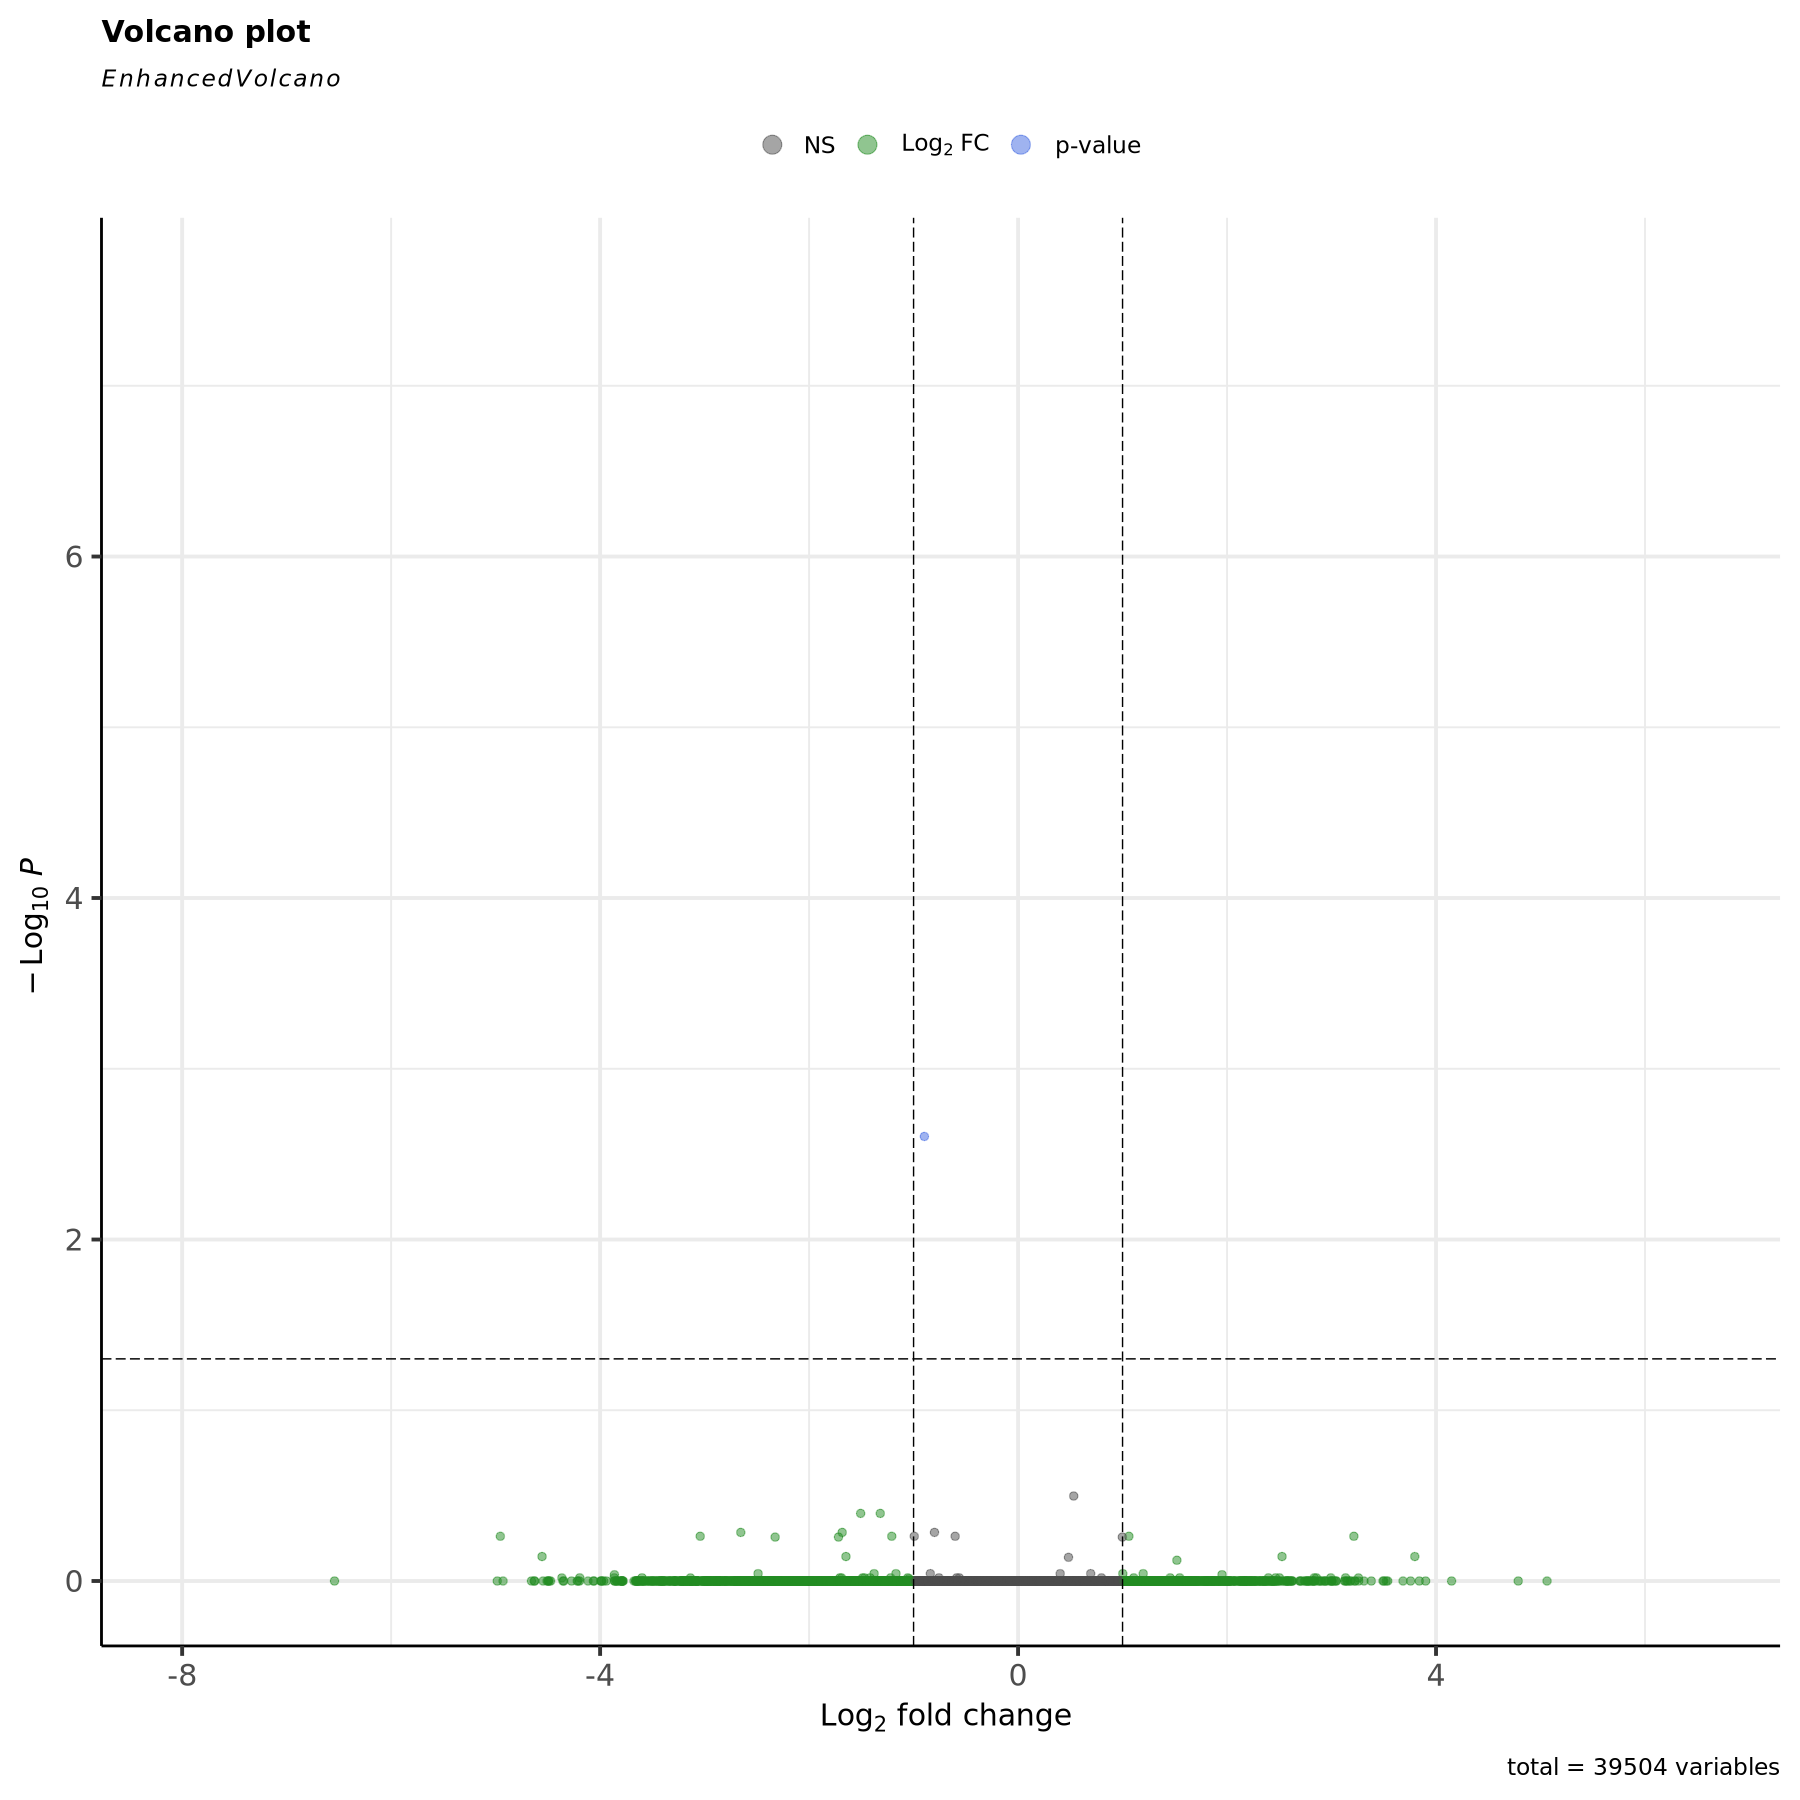

In [20]:
# hypoxic vs control for phase 1
summary(results1)

EnhancedVolcano(results1,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

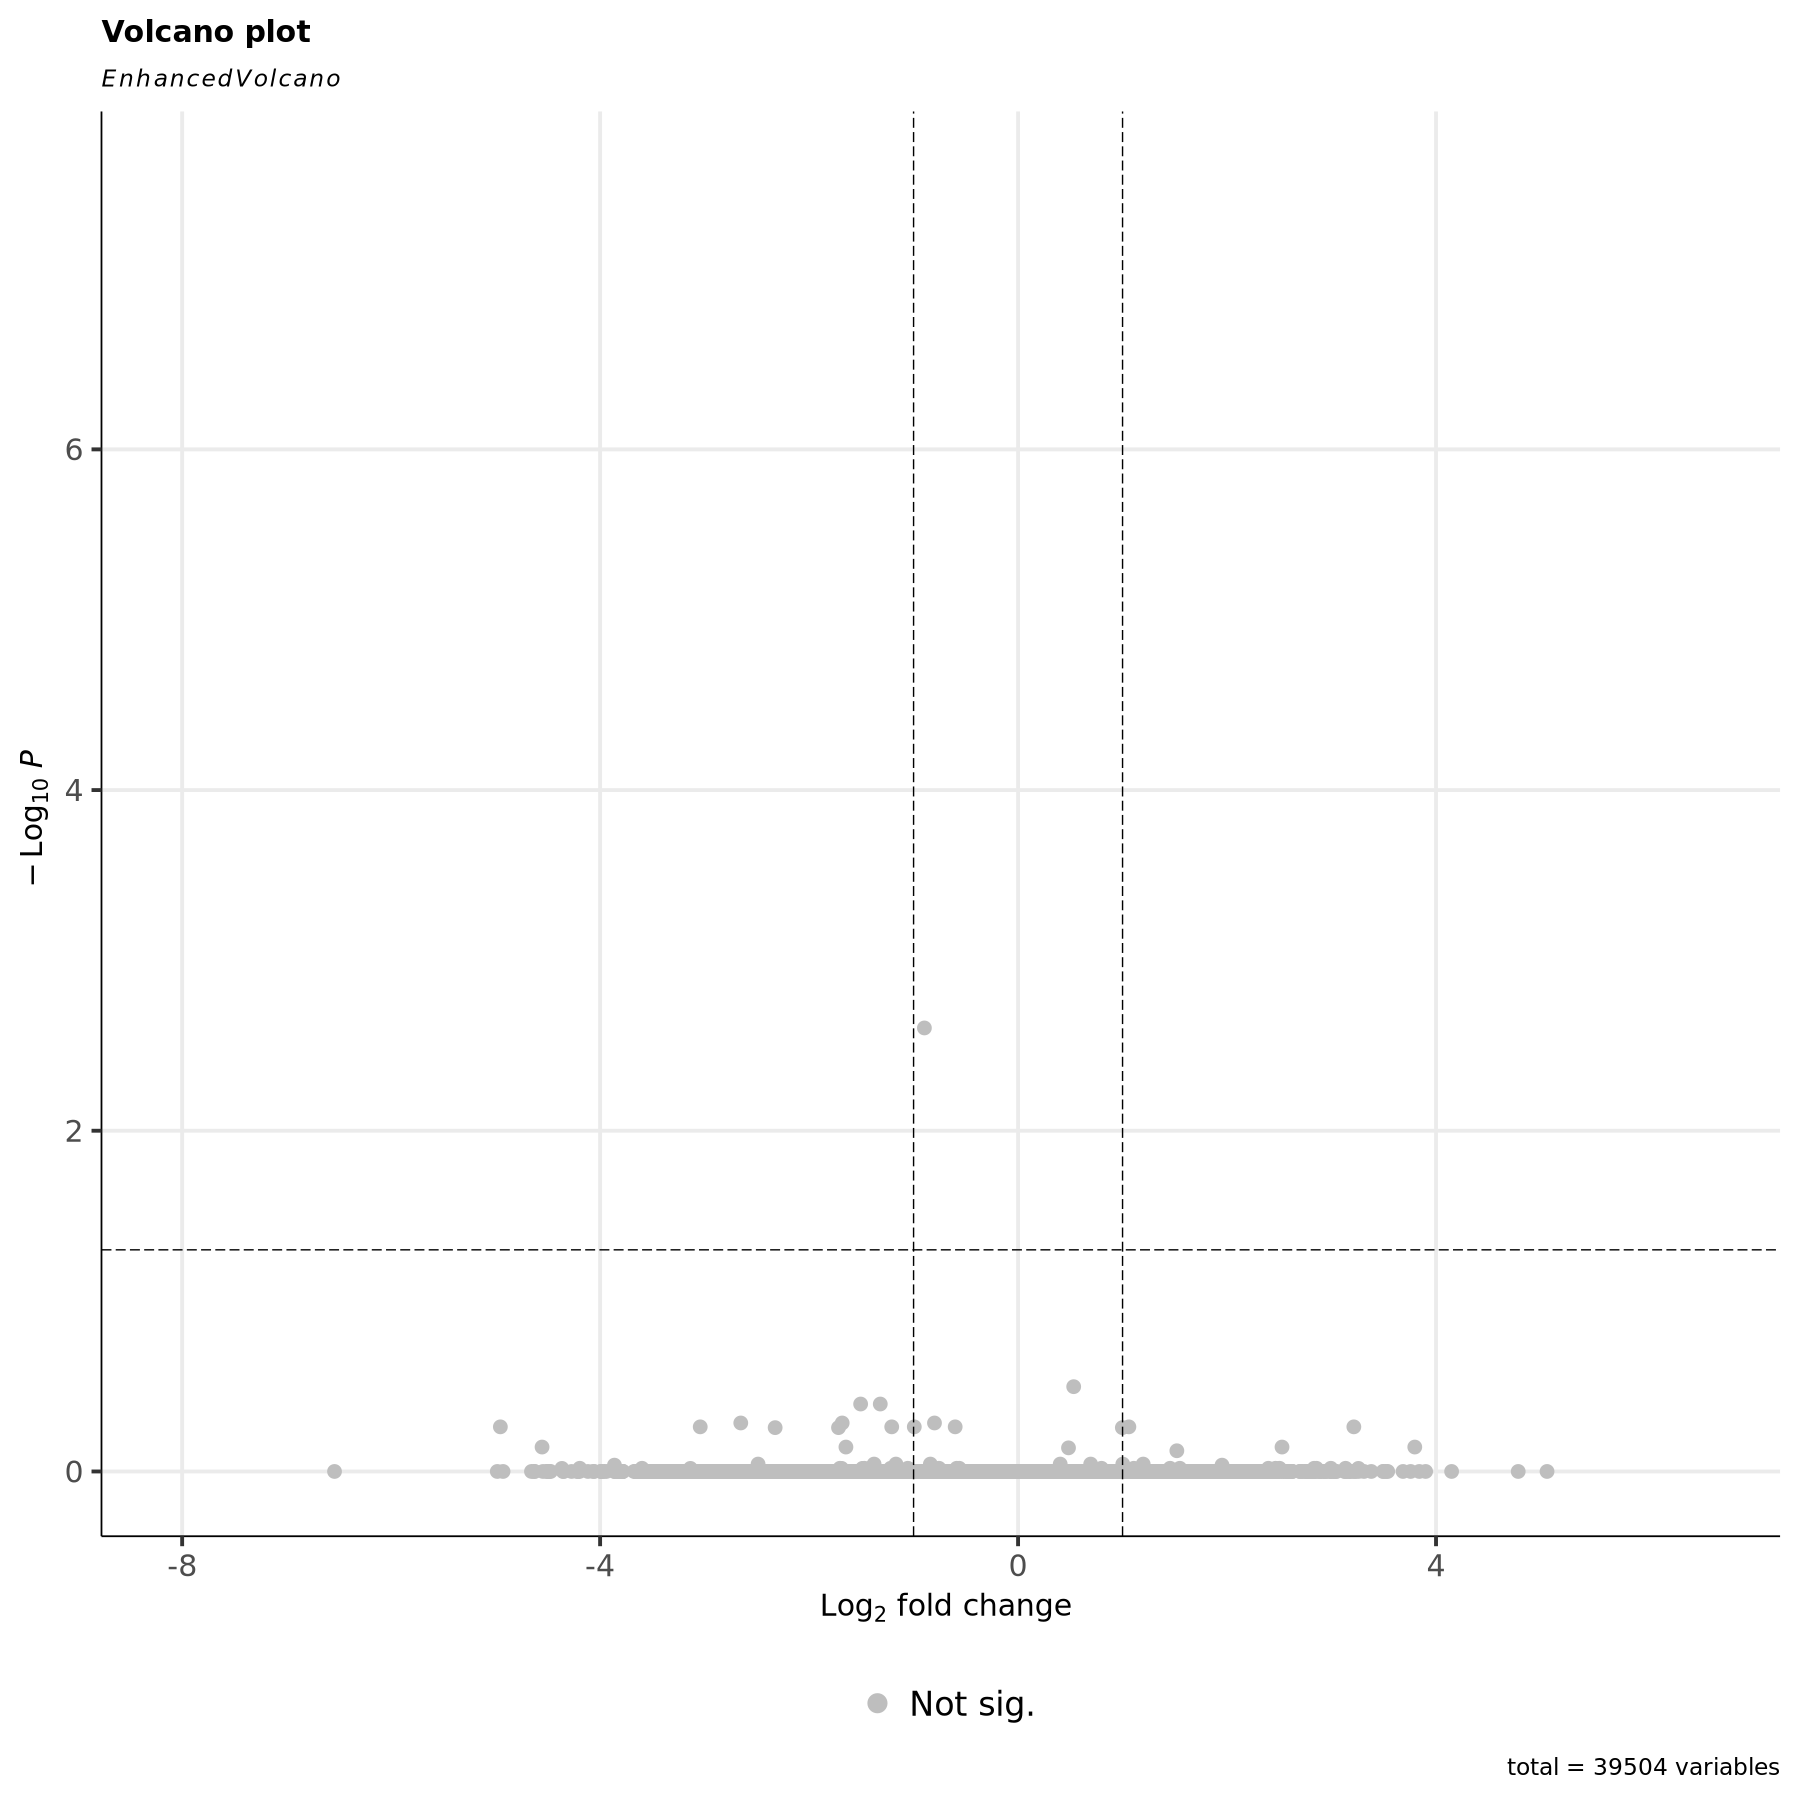

In [21]:
# more detailed plot with labels and colors

keyvals <- ifelse(
results1$log2FoldChange < -1& results1$padj <0.05, "#000066",
  ifelse(results1$log2FoldChange > 1& results1$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Hypoxic'
names(keyvals)[keyvals == 'grey'] <- 'Not sig.'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Control'

results1_plot <- EnhancedVolcano(results1,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(results1)[which(names(keyvals) %in% c('More methylation in Hypoxic', 'More methylation in Control'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'bottom',
    legendLabSize = 20,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
results1_plot

saving plot as a PDF 

In [22]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("phase1_hypoxic_control.pdf", width=10, height=10) 
# 2. Create a plot
results1_plot
# Close the pdf filegb
dev.off() 

ERROR: Error in setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures"): cannot change working directory


looking at both vs. control for phase 1, ignoring effects of phase 2

In [ ]:
# both vs control for phase 1
summary(results2)

EnhancedVolcano(results2,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
# changing plot dimensions
options(repr.plot.width=10, repr.plot.height=10)

looking at warm vs. control for phase 1, ignoring effects of phase 2

In [ ]:
# warm vs control for phase 1
# WITHOUT STAT FILTERING
summary(results3)

EnhancedVolcano(results3,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

read some papers that use filters in the DESeq results statistics - so looking at how that affects my data

first, looking at adding **alpha=0.05**, which is essentially a p-value threshold, controls false positive rate (FPR)
- typically, p-value significance is set to 0.05 or 5%

In [ ]:
# looking at how data changes with thresholds on l2fc and pvalue...
results3.2 <- results(p1_dds, alpha=0.05, contrast = contrast3)

# warm vs control for phase 1
summary(results3.2)

EnhancedVolcano(results3.2,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

slightly changes the number of significantly differentially methylated genes (originally had around 500 genes, now have about 410)

now looking at **alpha=0.05** and **lfcThreshold=1**
- log2FoldChange threshold - have to do this in statistics because otherwise adjusted p-value means nothing (null hyp. is that lfc=0, so if filter after, padj doesn't mean anything anymore)
    - setting lfcThreshold = 1 means you see a 2 fold-change in methylation

In [ ]:
# looking at how data changes with thresholds on l2fc and pvalue...
results3.2 <- results(p1_dds, alpha=0.05, lfcThreshold=1, contrast = contrast3)

# warm vs control for phase 1
summary(results3.2)

EnhancedVolcano(results3.2,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

now have around 60 genes that are differentially methlyated.. 

graph looks weird bc want to plot *all* points, and only have colored=filtered genes

In [ ]:
# looking at genes that are sig with filtered DESeq results

# grabbing all sig genes for warm vs. control for phase 1
filtered = as.data.frame(results3.2[which(results3.2$padj < 0.05), ])

# add meta data for those genees
filtered_genes = merge(filtered, counts_meta, by="row.names")
head(filtered_genes) 

In [ ]:
# creating 'prettier' more detailed plot
keyvals <- ifelse(
results3$log2FoldChange < -1& results3$padj <0.05, "#000066",
  ifelse(results3$log2FoldChange > 1& results3$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not sig.'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Control'

results3_plot <- EnhancedVolcano(results3,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(results3)[which(names(keyvals) %in% c('More methylation in Warm', 'More methylation in Control'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'bottom',
    legendLabSize = 20,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
results3_plot

In [ ]:
### saving UNFILTERED STAT sig genes into dataframe and csv file

# grabbing all sig genes for warm vs. control for phase 1
warm_v_control.sig_genes = as.data.frame(results3[which(results3$padj < 0.05), ])

# add meta data for those genees
sig_wc_genes = merge(warm_v_control.sig_genes, counts_meta, by="row.names")
head(sig_wc_genes) 

# writing csv file
write.csv(sig_wc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p1_wc_genes.csv")

In [ ]:
# saving 'pretty', unfiltered plot as PDF
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("phase1_warm_control.pdf", width=10, height=10) 
# 2. Create a plot
results3_plot
# Close the pdf filegb
dev.off() 

#### looking at effects of phase 2, ignoring phase 1

In [ ]:
p2_dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

In [ ]:
colData(p2_dds)$Phase2 <- factor(colData(p2_dds)$Phase2, levels = c("control", "hypoxic", "warm", "both"))
head(colData(p2_dds))

In [ ]:
# need to first specify contrasts
contrast4 <- c("Phase2", "hypoxic", "both")
contrast5 <- c("Phase2", "both", "control")
#contrast6 <- c("Phase2", "warm", "control") don't actually have these samples

In [ ]:
results4 <- results(p2_dds, contrast = contrast4)
results5 <- results(p2_dds, contrast = contrast5)
#results6 <- results(p2_dds, contrast = contrast6) don't have these samples

In [ ]:
# phase 2 hypoxic vs both
summary(results4)
   
EnhancedVolcano(results4,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for hypoxic vs. control for phase 2
hypoxic_v_control.sig_genes = as.data.frame(results4[which(results4$padj < 0.05), ])

# add meta data for those genes
sig_hc_genes = merge(hypoxic_v_control.sig_genes, counts_meta, by="row.names")
head(sig_hc_genes)

# writing csv file
write.csv(sig_hc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2_hc_genes.csv")

In [ ]:
# phase 2 both vs control
summary(results5)
   
EnhancedVolcano(results5,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
keyvals <- ifelse(
results5$log2FoldChange < -1& results5$padj <0.05, "#000066",
  ifelse(results5$log2FoldChange > 1& results5$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Both'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Control'

results5_plot <- EnhancedVolcano(results5,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(results5)[which(names(keyvals) %in% c('More methylation in Both', 'More methylation in Control'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
results5_plot

In [ ]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for both vs. control for phase 2
both_v_control.sig_genes = as.data.frame(results5[which(results5$padj < 0.05), ])

# add meta data for those genes
sig_bc_genes = merge(both_v_control.sig_genes, counts_meta, by="row.names")
head(sig_bc_genes)

# writing csv file
write.csv(sig_bc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2_bc_genes.csv")

#### given phase 2, what is the effect of phase 1


In [ ]:
# for phase 2 hypoxic
p2hypoxic_meta = filter(meta, meta$Phase2 == 'hypoxic')
p2hypoxic_meta                               

In [ ]:
# have to make sure counts matrix has the same columns as rows in meta
p2hypoxic_counts = counts_gene[,colnames(counts_gene) %in% p2hypoxic_meta$unique_ID, drop=FALSE]
head(p2hypoxic_counts)

In [ ]:
p2h_dds <- DESeqDataSetFromMatrix(countData = p2hypoxic_counts,
                              colData = p2hypoxic_meta, 
                              design = ~ Phase1)
p2h_dds=DESeq(p2h_dds)
resultsNames(p2h_dds)

In [ ]:
# phase 2 = hypoxic, looking at hypoxic vs. control for phase 1
res_p2h=results(p2h_dds, name="Phase1_hypoxic_vs_control")

summary(res_p2h)
   
EnhancedVolcano(res_p2h,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for hypoxic vs. control for phase 1, given phase 2 (hypoxic)
p21_hc.sig_genes = as.data.frame(res_p2h[which(res_p2h$padj < 0.05), ])

# add meta data for those genes
sig_p2h_hc_genes = merge(p21_hc.sig_genes, counts_meta, by="row.names")
head(sig_p2h_hc_genes)

# writing csv file
write.csv(sig_p2h_hc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2h_p1hc_genes.csv")

In [ ]:
# for phase 2 both
p2both_meta = filter(meta, meta$Phase2 == 'both')
p2both_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2both_counts = counts_gene[,colnames(counts_gene) %in% p2both_meta$unique_ID, drop=FALSE]
head(p2both_counts)

In [ ]:
p2both_dds <- DESeqDataSetFromMatrix(countData = p2both_counts,
                              colData = p2both_meta, 
                              design = ~ Phase1)
p2both_dds=DESeq(p2both_dds)
resultsNames(p2both_dds)

In [ ]:
# phase 1 effects (warm vs. both) given phase 2 (both)
res_p2b=results(p2both_dds, name="Phase1_warm_vs_both")

summary(res_p2b)
   
EnhancedVolcano(res_p2b,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for warm vs. both for phase 1, given phase 2 (both)
p21_wb.sig_genes = as.data.frame(res_p2b[which(res_p2b$padj < 0.05), ])

# add meta data for those genes
sig_p2b_wb_genes = merge(p21_wb.sig_genes, counts_meta, by="row.names")
head(sig_p2b_wb_genes)

# writing csv file
write.csv(sig_p2b_wb_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2b_p1wb_genes.csv")

In [ ]:
# for phase 2 both
p2control_meta = filter(meta, meta$Phase2 == 'control')
p2control_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2control_counts = counts_gene[,colnames(counts_gene) %in% p2control_meta$unique_ID, drop=FALSE]
head(p2control_counts)

In [ ]:
p2control_dds <- DESeqDataSetFromMatrix(countData = p2control_counts,
                              colData = p2control_meta, 
                              design = ~ Phase1)
p2control_dds=DESeq(p2control_dds)
resultsNames(p2control_dds)

In [ ]:
# effects of phase 1 (hypoxic vs. control), given phase 2 (control)
res_p2c=results(p2control_dds, name="Phase1_hypoxic_vs_control")

summary(res_p2c)
   
EnhancedVolcano(res_p2c,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for hypoxic vs. control for phase 1, given phase 2 (control)
p21_hc.sig_genes = as.data.frame(res_p2c[which(res_p2c$padj < 0.05), ])

# add meta data for those genes
sig_p2c_hc_genes = merge(p21_hc.sig_genes, counts_meta, by="row.names")
head(sig_p2c_hc_genes)

# writing csv file
write.csv(sig_p2c_hc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2c_p1hc_genes.csv")

In [ ]:
dds_t1 <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T1_temp + T1_oxygen + T1_temp:T1_oxygen)
dds_t1=DESeq(dds_t1)
resultsNames(dds_t1)

In [ ]:
model.matrix(~T1_temp + T1_oxygen + T1_temp:T1_oxygen, data = meta)

so i should relevel because this is treating normoxic warm as the control I think?

In [ ]:
tail(meta)

In [ ]:
res_t1_temp=results(dds_t1, name="T1_temp_warm_vs_ambient")

summary(res_t1_temp)
   
EnhancedVolcano(res_t1_temp,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res_t1_oxygen=results(dds_t1, name="T1_oxygen_normoxic_vs_hypoxic")

summary(res_t1_oxygen)
   
EnhancedVolcano(res_t1_oxygen,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res_t1=results(dds_t1, name="T1_tempwarm.T1_oxygennormoxic")

summary(res_t1)
   
EnhancedVolcano(res_t1,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
dds_t2 <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T2_temp + T2_oxygen)
dds_t2=DESeq(dds_t2)
resultsNames(dds_t2)

In [ ]:
res_t2_temp=results(dds_t2, name="T2_temp_warm_vs_ambient")

summary(res_t2_temp)
   
EnhancedVolcano(res_t2_temp,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res_t2_oxygen=results(dds_t2, name="T2_oxygen_normoxic_vs_hypoxic")

summary(res_t2_oxygen)
   
EnhancedVolcano(res_t2_oxygen,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)